In [1]:
import pandas as pd
import numpy as np
import collections as co
from datetime import date as dt
import matplotlib.pyplot as plt

### The file containing all data is 2.9 gb. I will create a list then dataframe subsets for the park in question. The visitation files are much smaller. Those will be easier to work with. I still need to download visitation data for all parks. Site names and all site info is also loaded.

In [2]:
with open(r"C:\Users\ZaragozaJake\Documents\Jobs\TDI\AqmetParkdata\All Parks ValidatedData.csv",'r') as file:
    alldata=file.readlines()

In [3]:
visits = pd.read_csv(r"C:\Users\ZaragozaJake\Documents\Jobs\TDI\Denalivisitors.csv",skiprows=3)

In [3]:
sites = pd.read_csv(r"C:\Users\ZaragozaJake\Documents\Jobs\TDI\AqmetParkdata\All Parks SiteDetails.csv")

### Input parameters will be based on user inputs and the original file header.

In [5]:
#User inputs
parkname = '"ZION-DW"'
o3high = 45
o3low = 0
tmphigh = 20
tmplow = 12
solhigh = 700
sollow = 400 
rnfhigh = 0.1
rnflow = 0
rhhigh = 50
rhlow = 0
wshigh = 2
wslow = 0
#file inputs
labels = alldata[0]
labels = labels.replace('"','')
labels = labels.replace("'","")
labels = labels.replace("\n","")
labels = labels.split(',')
print('Header Information:',labels)
print('Example of data:',alldata[1])

Header Information: ['AQMET_ABBR', 'RECORD_DATE', 'O3', 'O3_UNITS', 'RH', 'RH_UNITS', 'RNF', 'RNF_UNITS', 'SDWD', 'SDWD_UNITS', 'SOL', 'SOL_UNITS', 'SWS', 'SWS_UNITS', 'TMP', 'TMP_UNITS', 'VWD', 'VWD_UNITS', 'VWS', 'VWS_UNITS']
Example of data: "ABLI-KC",07/01/2005 12:00:00 AM,-999,"ppb",-999,"percent",,"",,"",,"",,"",-999,"degC",,"",,""



### Lets run some tests...I need to come back to this. It takes too long to run this.

In [ ]:
#datacheck = [alldata[i].split(',') for i in range(len(alldata))]

In [ ]:
### Create an input series. Not sure if this is correct either. It is too computationally intensive for my machine.

In [18]:
sitenames = sites['ABBR']
filesplit = [z for z in alldata if sitenames[0] in z]

In [1]:
print(len(filesplit))
filesplit[1487]

NameError: name 'filesplit' is not defined

### All sites (some parks have (had) more than one site) have a unique identifier code, the 'AQMET_ABBR.' is that code. Use list comprehension to filter based on park. 

In [6]:
parkaqmet = [x for x in alldata if parkname in x]

### Create data frame of park aqmet subset. First change every string in the list into a list itself.

In [7]:
parkaqmetprep = [parkaqmet[i].split(',') for i in range(len(parkaqmet))]

In [8]:
parkaqmetdf = pd.DataFrame(parkaqmetprep,columns=labels)

### Clean up data: change to numeric, change -999 and blank cells to NaN, add datetime object

In [9]:
parkaqmetdf['RECORD_DATE'] = pd.to_datetime(parkaqmetdf['RECORD_DATE'])
parkaqmetdf = parkaqmetdf.replace('',np.NaN)
col = parkaqmetdf.columns[2:19]
parkaqmetdf[col] = parkaqmetdf[col].apply(pd.to_numeric, errors='ignore')
#parkaqmetdf = parkaqmetdf.apply(pd.to_numeric, errors='ignore')
parkaqmetdf = parkaqmetdf.replace(-999.00,np.NaN)

### Check for unit changes and make universal. PPB for ozone, % for RH, mm/Hr for precip, W/m^2 for solar rad, m/s for WS, Deg Celsius for temp. First count all different types of units/column. This is HARDCODED for DENALI-HQ! 

In [10]:
o3units = co.Counter(parkaqmetdf['O3_UNITS'])# ppm and ppb
rhunits = co.Counter(parkaqmetdf['RH_UNITS'])# % and empty. Hopefully it is NaN.
rnfunits = co.Counter(parkaqmetdf['RNF_UNITS'])# in/hr and mm/hr
solunits = co.Counter(parkaqmetdf['SOL_UNITS'])#ly/min and w/m2 also empty
swsunits = co.Counter(parkaqmetdf['SWS_UNITS'])#m/s and mph
tmpunits = co.Counter(parkaqmetdf['TMP_UNITS'])#DGC

parkaqmetdf.loc[parkaqmetdf['O3_UNITS'] == '"ppm"', 'O3'] = parkaqmetdf['O3']*1000
parkaqmetdf.loc[parkaqmetdf['O3_UNITS'] == '"ppm"', 'O3_UNITS'] = '"ppb"'

parkaqmetdf.loc[parkaqmetdf['RNF_UNITS'] == '"in/hr"', 'RNF'] = parkaqmetdf['RNF']*25.4
parkaqmetdf.loc[parkaqmetdf['RNF_UNITS'] == '"in/hr"', 'RNF_UNITS'] = '"mm/hr"'

parkaqmetdf.loc[parkaqmetdf['SOL_UNITS'] == '"ly/min"', 'SOL'] = parkaqmetdf['SOL']*697.3
parkaqmetdf.loc[parkaqmetdf['SOL_UNITS'] == '"ly/min"', 'SOL_UNITS'] = '"w/m2"'

parkaqmetdf.loc[parkaqmetdf['SWS_UNITS'] == '"mph"', 'SWS'] = parkaqmetdf['SWS']*0.44704
parkaqmetdf.loc[parkaqmetdf['SWS_UNITS'] == '"mph"', 'SWS_UNITS'] = '"m/s"'



#asdf = list(map(int,o3units))
#subset=parkaqmetdf.head(10)

#subset

### Tests for unit changes. Print out all output for obvious unit changes.

In [11]:
print(o3units)
print(rhunits)
print(rnfunits)
print(solunits)
print(swsunits)
print(tmpunits)

Counter({'"ppb"': 138048})
Counter({'"percent"': 84000, '""': 54048})
Counter({'"mm/hr"': 138043, '""': 5})
Counter({'"w/m2"': 138048})
Counter({'"m/s"': 138048})
Counter({'"degC"': 138048})


(0, 133.953)

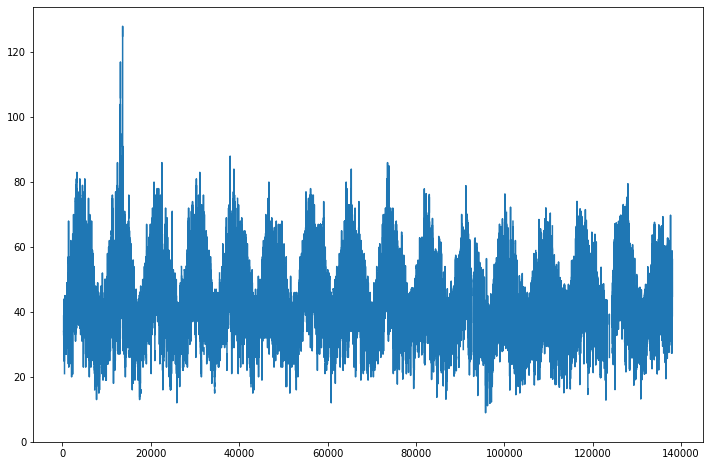

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(parkaqmetdf['O3'])
ax.set_ylim(0)

(0, 104.95)

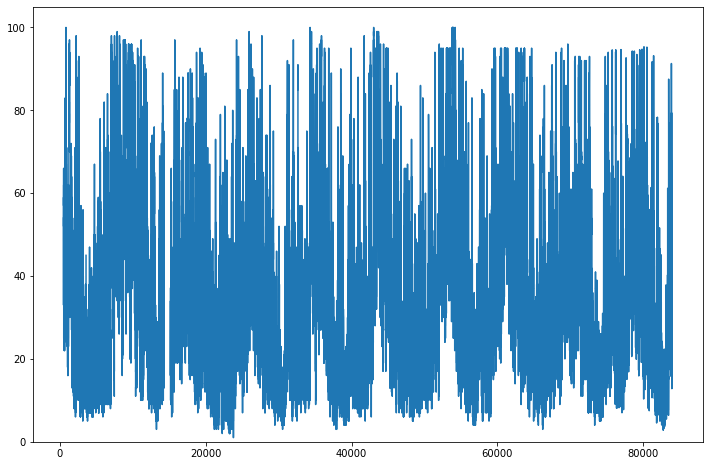

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(parkaqmetdf['RH'])
ax.set_ylim(0)

(0, 24.801000000000002)

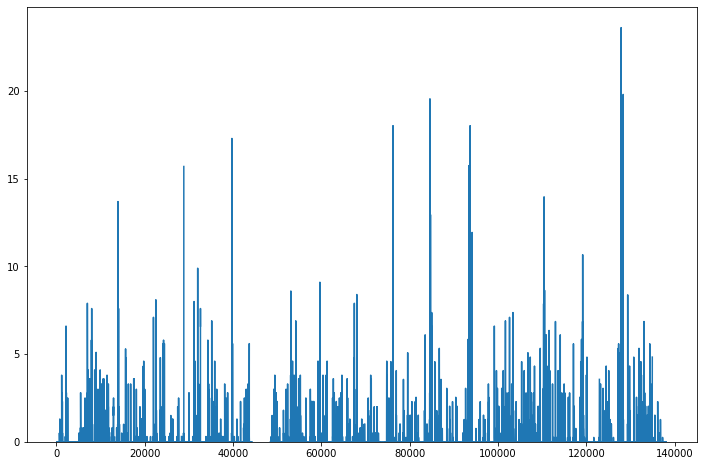

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(parkaqmetdf['RNF'])
ax.set_ylim(0)

(0, 1258.406)

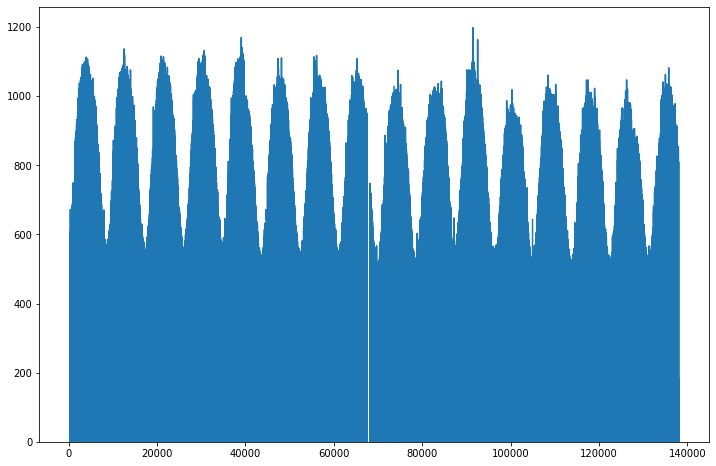

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(parkaqmetdf['SOL'])
ax.set_ylim(0)

(0, 46.497)

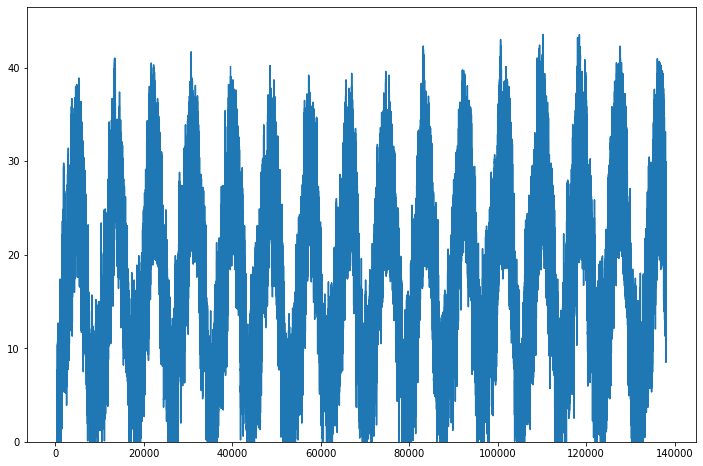

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(parkaqmetdf['TMP'])
ax.set_ylim(0)

In [19]:
### Now we have a 'complete' dataframe and is clean and consistent. Newest data is 2019. Oldest is 1987 (for denali)
### Pick out subset with only complete years.
### Create 'mean' year and associated stdev with groupby. This is the first stab. It does remove a lot of variability in data, 
### but its a start.
years = parkaqmetdf['RECORD_DATE'].dt.year
lowyear = years.loc[0]
highyear = years.iloc[-1]
AQMET = parkaqmetdf.loc[parkaqmetdf['RECORD_DATE'].dt.year.between(lowyear,highyear,inclusive=False)]

In [20]:
meanyear = AQMET.groupby([AQMET['RECORD_DATE'].dt.month, AQMET['RECORD_DATE'].dt.day, AQMET['RECORD_DATE'].dt.hour]).mean()
stdevyears = AQMET.groupby([AQMET['RECORD_DATE'].dt.month, AQMET['RECORD_DATE'].dt.day, AQMET['RECORD_DATE'].dt.hour]).std()

### Now we can input the user preferences and search the mean year. Lets also pull out the months and days these preferences occur. 

In [21]:
meetscriteria = meanyear.loc[(meanyear['O3'].between(o3low,o3high,inclusive=True))\
                                   & (meanyear['RH'].between(rhlow,rhhigh,inclusive=True))\
                                   & (meanyear['RNF'].between(rnflow,rnfhigh,inclusive=True))\
                                   & (meanyear['SOL'].between(sollow,solhigh,inclusive=True))\
                                   & (meanyear['SWS'].between(wslow,wshigh,inclusive=True))\
                                   & (meanyear['TMP'].between(tmplow,tmphigh,inclusive=True))]

month=meetscriteria.index.get_level_values(0)
day=meetscriteria.index.get_level_values(1)   

stdevcriteria = stdevyears.loc[(meanyear['O3'].between(o3low,o3high,inclusive=True))\
                                   & (meanyear['RH'].between(rhlow,rhhigh,inclusive=True))\
                                   & (meanyear['RNF'].between(rnflow,rnfhigh,inclusive=True))\
                                   & (meanyear['SOL'].between(sollow,solhigh,inclusive=True))\
                                   & (meanyear['SWS'].between(wslow,wshigh,inclusive=True))\
                                   & (meanyear['TMP'].between(tmplow,tmphigh,inclusive=True))]


In [22]:
meetscriteria

O3         RH       RNF  \
RECORD_DATE RECORD_DATE RECORD_DATE                                   
4           13          10           43.944000  35.788000  0.010000   
            21          9            43.795455  38.561429  0.000000   
            22          9            43.913636  37.115714  0.000000   
5           2           9            44.934615  43.188750  0.069231   
            3           9            43.978462  41.607500  0.100000   
...                                        ...        ...       ...   
11          1           13           40.223333  46.212500  0.100000   
                        14           41.065556  41.802500  0.062500   
            2           12           39.036667  36.535000  0.000000   
                        14           41.836667  30.040000  0.000000   
            6           14           42.958889  32.790000  0.000000   

                                          SDWD         SOL       SWS  \
RECORD_DATE RECORD_DATE RECORD_DATE                                    
4           13          10           45.048000  663.964000  1.651000   
            21          9            39.518333  695.520833  1.690833   
            22          9            36.302500  666.657500  1.475000   
5           2           9            41.675000  562.519231  1.311667   
            3           9            38.032500  604.829231  1.468333   
...                                        ...         ...       ...   
11          1           13           32.986667  392.783333  1.743333   
                        14           33.863333  320.608889  1.797778   
            2           12           39.966667  552.613333  1.695556   
                        14           34.184444  404.747778  1.908889   
            6           14           31.668889  390.321111  1.891111   

                                           TMP       VWD     VWS  
RECORD_DATE RECORD_DATE RECORD_DATE                               
4           13          10           12.861000  196.7500  1.5860  
            21          9            12.420000  222.7260  1.0520  
            22          9            12.907500  221.0340  1.0680  
5           2           9            12.547692  190.2975  0.8125  
            3           9            13.204615  226.3875  0.8700  
...                                        ...       ...     ...  
11          1           13           13.990000  169.5660  1.3960  
                        14           14.986667  166.7220  1.6820  
            2           12           13.044444  223.4920  1.6180  
                        14           14.770000  186.9060  1.8540  
            6           14           12.131111  209.1380  2.0440  

[204 rows x 9 columns]

### Averaging will likely get rid of a lot of the variability. What will that look like?

In [23]:
stdevcriteria

O3         RH       RNF       SDWD  \
RECORD_DATE RECORD_DATE RECORD_DATE                                             
4           13          10           6.671738   8.873315  0.031623  11.619854   
            21          9            7.079454  13.209651  0.000000  11.717400   
            22          9            7.057124  13.950275  0.000000  13.027448   
5           2           9            5.463573  16.963765  0.179743  14.732898   
            3           9            7.413418  14.404947  0.360555  12.030413   
...                                       ...        ...       ...        ...   
11          1           13           3.124944  27.748029  0.282843  12.749524   
                        14           3.143816  25.561521  0.176777  12.763961   
            2           12           7.521931   8.547286  0.000000  12.544402   
                        14           5.370438   4.372307  0.000000  14.733466   
            6           14           5.791264   1.698215  0.000000  12.947736   

                                            SOL       SWS       TMP  \
RECORD_DATE RECORD_DATE RECORD_DATE                                   
4           13          10           238.991537  0.853938  4.570963   
            21          9             36.341286  0.888558  3.678646   
            22          9            118.694514  0.731580  4.126881   
5           2           9            223.552302  0.341383  4.562837   
            3           9            194.660414  0.389518  3.715130   
...                                         ...       ...       ...   
11          1           13           150.410939  0.918940  4.419406   
                        14           104.106454  1.312153  4.348008   
            2           12            90.674379  0.639787  3.692279   
                        14            47.548898  1.069760  3.928034   
            6           14            41.676928  1.182153  4.206336   

                                            VWD       VWS  
RECORD_DATE RECORD_DATE RECORD_DATE                        
4           13          10           101.532947  0.768720  
            21          9             17.950133  0.357309  
            22          9             28.110453  0.490887  
5           2           9             78.380260  0.473101  
            3           9             15.559470  0.319687  
...                                         ...       ...  
11          1           13            47.194201  1.243415  
                        14            63.962035  1.847869  
            2           12            16.643103  0.586490  
                        14            41.232320  1.487222  
            6           14            50.390776  1.512359  

[204 rows x 9 columns]

### How do we get the output of the month and day into an array? Create empty data frame that we will populate with the output of the preferences finder above.

In [24]:
#nummonths = month.size
#numdays = day.size
uniquedays = len(meetscriteria)


monthday = [month, day]
monthday = np.asanyarray(monthday)#array with each column as month-day (row 0 is months and row 1 is days)



In [17]:
#getting the sub DF based on May 25th and June 3rd. It works! NEED TO FIGURE OUT HOW TO NOT HARDCODE THIS!
#for loop?
#test=meanyear.loc[(meanyear.index.get_level_values(level=0) == monthday[0,0])\
#                  & (meanyear.index.get_level_values(level=1) == monthday[1,0])]

#test2 = meanyear.loc[(meanyear.index.get_level_values(level=0) == monthday[0,1])\
#                  & (meanyear.index.get_level_values(level=1) == monthday[1,1])]

NameError: name 'test2' is not defined

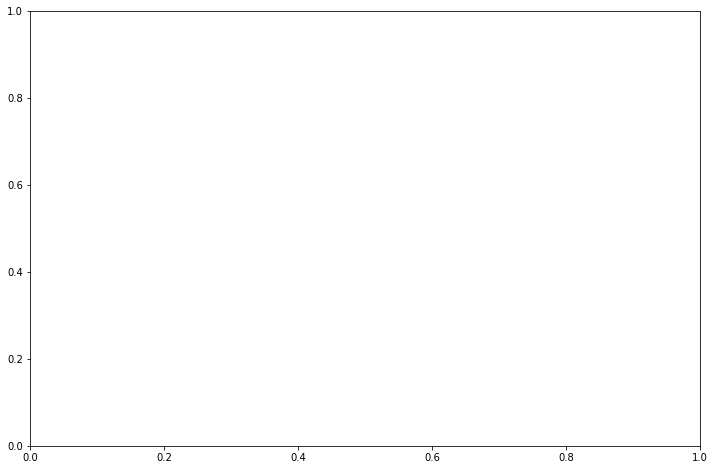

In [25]:
#My first plot!
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(test2.index.get_level_values(level=2),test2['O3'])
ax.set_ylim(0)


### I think this for loop generalizes what I do in 16. It only created 1 df with all days. But I can now call based on those days.

In [26]:
perfect = pd.DataFrame([])
for x in range(uniquedays):
    a=meanyear.loc[(meanyear.index.get_level_values(level=0) == monthday[0,x])\
    & (meanyear.index.get_level_values(level=1) == monthday[1,x])]
    perfect=perfect.append(a)


In [ ]:
#This is a large one for DINO. Lets plot just one day.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(test2.index.get_level_values(level=2),test2['O3'])
ax.set_ylim(0)


In [27]:
perfect

O3       RH   RNF       SDWD  \
RECORD_DATE RECORD_DATE RECORD_DATE                                        
4           13          0            36.960000  54.0160  0.00  36.631000   
                        1            31.646000  61.1640  0.00  43.078000   
                        2            30.813000  65.5080  0.00  37.386000   
                        3            27.521000  67.1400  0.00  34.222000   
                        4            27.148000  71.6600  0.32  44.155000   
...                                        ...      ...   ...        ...   
11          6           19           35.055556  59.9225  0.00  26.728889   
                        20           31.742222  64.0175  0.00  32.483333   
                        21           29.561111  70.3550  0.00  35.746667   
                        22           26.993333  74.3350  0.00  31.072222   
                        23           25.757778  74.6975  0.00  31.930000   

                                          SOL       SWS       TMP      VWD  \
RECORD_DATE RECORD_DATE RECORD_DATE                                          
4           13          0            0.296000  0.976000  7.218000   97.170   
                        1            0.297000  0.796000  6.100000  176.798   
                        2            0.293000  0.804000  5.315000  164.710   
                        3            0.291000  1.107000  4.511000  179.300   
                        4            0.289000  1.166000  3.415000  256.188   
...                                       ...       ...       ...      ...   
11          6           19           0.313333  1.365556  6.636667  155.610   
                        20           0.310000  1.270000  5.611111   69.904   
                        21           0.312222  0.981111  4.622222  150.332   
                        22           0.310000  0.960000  3.722222  114.448   
                        23           0.308889  0.948889  2.965556  229.760   

                                       VWS  
RECORD_DATE RECORD_DATE RECORD_DATE         
4           13          0            0.878  
                        1            0.708  
                        2            0.702  
                        3            1.106  
                        4            1.284  
...                                    ...  
11          6           19           1.900  
                        20           1.582  
                        21           1.144  
                        22           0.960  
                        23           0.938  

[4896 rows x 9 columns]

### Now for the linear regression stuff. First I will get rid of 2019 since it isn't complete yet.

(0, 2019.95)

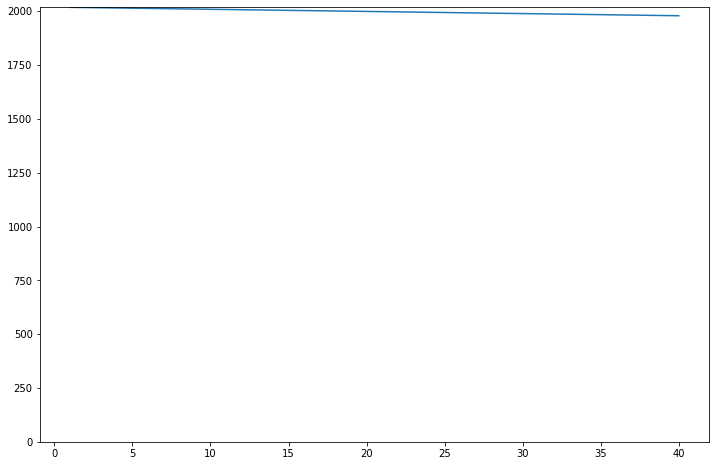

In [32]:
visits1 = visits.drop([0])
visits1 = visits1.sort_values('Year',ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(visits1.loc[:,'Year'])
ax.set_ylim(0)
#visits1
#This is doing what I want it to...


In [36]:
print(visits1)
visits1.loc[:,'MAY']

    Year    JAN    FEB    MAR    APR     MAY      JUN      JUL      AUG  \
40  1979    336    103    630    848  14,076   46,804   69,557   76,400   
39  1980    198    146    401    633  12,791   27,623   61,983   73,791   
38  1981    171    162    412    690  13,982   29,667   87,751   89,013   
37  1982    142    118    378    706  13,747   62,926   92,544   93,941   
36  1983    122    112    327    727  11,631   45,905  115,179  114,480   
35  1984    111    122    273    667  11,872   75,277  113,103  106,906   
34  1985    169    161    346    661  10,993   94,794  144,598  126,482   
33  1986    134    162    553  1,951  18,729  105,083  159,012  175,203   
32  1987     88     88    512    935  48,133  122,168  180,357  151,548   
31  1988    100    130    259    906  56,162  181,452  183,647  107,346   
30  1989     97    228    449    899  18,541   79,332  213,085  151,263   
29  1990     94    198    328    551  11,950   72,836  222,077  155,352   
28  1991     94     88   

40    14,076
39    12,791
38    13,982
37    13,747
36    11,631
35    11,872
34    10,993
33    18,729
32    48,133
31    56,162
30    18,541
29    11,950
28     6,943
27    29,254
26    32,807
25    36,235
24    25,415
23    24,676
22    23,058
21    26,131
20    23,686
19    23,810
18    25,020
17    25,525
16    27,260
15    30,132
14    27,022
13    28,829
12    37,143
11    27,773
10    24,759
9     29,350
8     33,549
7     32,983
6     44,947
5     49,380
4     55,920
3     50,776
2     62,497
1     52,147
Name: MAY, dtype: object